In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time 
%matplotlib inline

### Here's a more detailed explanation of each column in dataset:

1. `country`: This column contains the names or labels of different countries. It serves as a unique identifier for each country in the dataset.

2. `child_mort`: Child Mortality Rate is the number of children (under the age of 5) who die per 1,000 live births in a given year. It is an important indicator of the overall health and well-being of a country's population.

3. `exports`: This column represents the total value of goods and services that a country sells to other countries. It is often measured in the country's currency and is a key indicator of a country's trade activity and economic health.

4. `health`: The Health column likely represents the percentage of a country's Gross Domestic Product (GDP) that is spent on healthcare. It provides insights into a country's commitment to its healthcare system and the overall health of its population.

5. `imports`: Similar to exports, this column represents the total value of goods and services that a country purchases from other countries. It is measured in the country's currency and is another key indicator of a country's trade activity and economic health.

6. `income`: The Income column typically represents the average income or per capita income in a country. It reflects the average earnings of individuals in that country and is a measure of economic well-being.

7. `inflation`: Inflation is the rate at which the general level of prices for goods and services rises, resulting in a decrease in the purchasing power of a country's currency. The Inflation column likely represents the annual inflation rate for each country.

8. `life_expec`: Life Expectancy at Birth is the average number of years a person born in a given country can expect to live if current mortality rates remain constant throughout their lifetime. It's a crucial indicator of the overall health and well-being of a population.

9. `total_fer`: The Total Fertility Rate represents the average number of children a woman is expected to have during her lifetime in a given country. It provides insights into the country's population growth and demographic trends.

10. `gdpp`: Gross Domestic Product (GDP) per capita is a measure of the economic output or income generated per person in a country. It's a key indicator of the country's overall economic development and standard of living.

These columns collectively provide valuable insights into various aspects of a country's social, economic, and health-related conditions, making them important for analyzing and understanding the overall well-being and development of different nations.

In [25]:
data = pd.read_csv('Country.csv')
data.head(50)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


## Q1. Check for missing values, duplicate values and correlation And resolve them accordingly

#### Checking Nulls/NaN Values

In [26]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Checking Duplicated Columns

In [27]:
data.duplicated().sum()

0

#### Understanding Correlation 

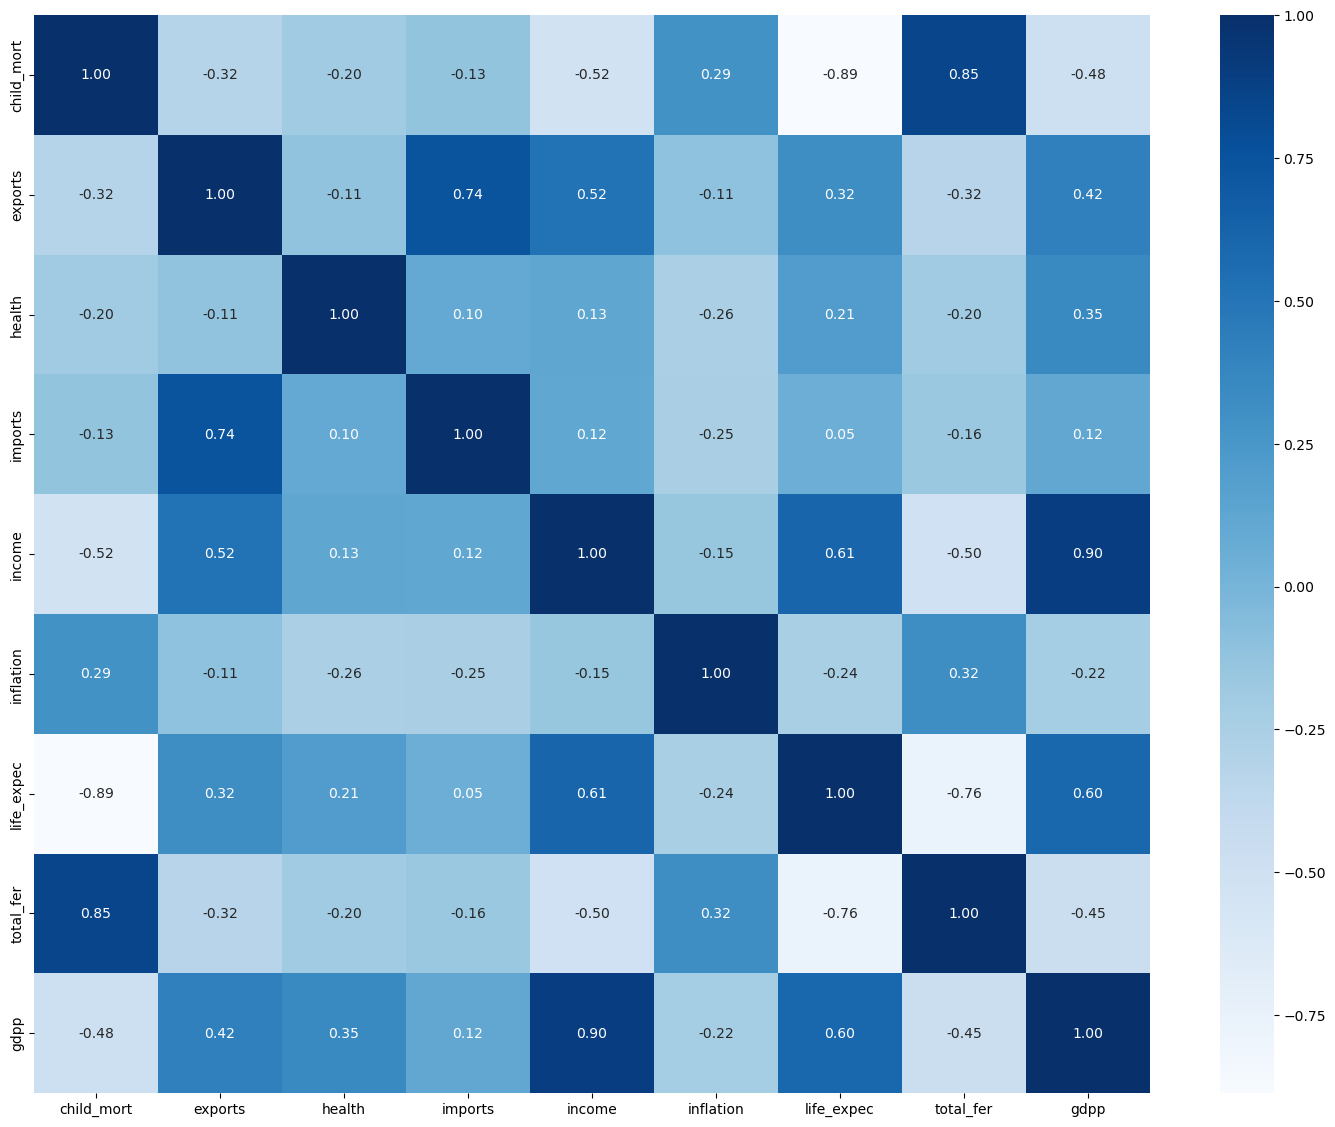

In [28]:
corr_ = data.corr()
fig, ax = plt.subplots(figsize=(18,14))
sns.heatmap(corr_, annot=True, fmt='.2f', cmap='Blues', linewidths=.0005)
plt.show()

## Conclusions:
* Highest Direct Relation: `income & gdpp:` **0.90**, `total_fer & child_mort:` **0.85**, `imports & exports:` **0.74**.
* Highest Inverse Relation: `life_expec & child_mort:` **-0.89**, `life_expec & total_fer:` **-0.76**.

## Q2. Which countries should be provided with the aid ?

In [29]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [30]:
data.columns
# health params - child_mort, life_expec, total_fer.
# revenue params - exports, imports, income, inflation, gdpp health.

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### Clustering based on `Health Params`

In [31]:
cluster_org_1 = data.copy()
cluster_org_1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


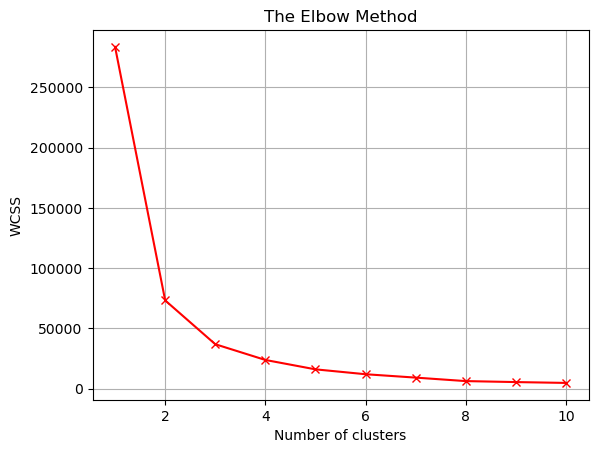

10.193074703216553


In [32]:
cluster_1 = cluster_org_1.copy()
x_c1 = cluster_1[['life_expec','total_fer','child_mort']]
start = time.time()
wcss = []
for i in range(1, 11):
    kmean = KMeans(n_clusters = i, random_state = 42)
    kmean.fit(x_c1)
    wcss.append(kmean.inertia_)
plt.plot(range(1, 11), wcss, 'rx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
print(time.time() - start)

In [33]:
kmean_c1 = KMeans(n_clusters=3)
y_label1_c1 = kmean_c1.fit_predict(x_c1)
cluster_1['cluster_1_label'] = y_label1_c1

In [34]:
y_label1_c1.shape
cluster_1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_1_label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [35]:
cluster0 = cluster_1[cluster_1['cluster_1_label'] == 0]
cluster1 = cluster_1[cluster_1['cluster_1_label'] == 1]
cluster2 = cluster_1[cluster_1['cluster_1_label'] == 2]

In [36]:
# !pip install plotly
import plotly.express as px
cluster_0_df = cluster0[['child_mort','life_expec','total_fer']]
cluster_1_df = cluster1[['child_mort','life_expec','total_fer']] 
cluster_2_df = cluster2[['child_mort','life_expec','total_fer']]
fig = px.scatter_3d(cluster_0_df, x='child_mort', y='life_expec', z='total_fer', color_discrete_sequence=['black'])
fig.add_trace(px.scatter_3d(cluster_1_df, x='child_mort', y='life_expec', z='total_fer', color_discrete_sequence=['blue']).data[0])
fig.add_trace(px.scatter_3d(cluster_2_df, x='child_mort', y='life_expec', z='total_fer', color_discrete_sequence=['red']).data[0])
fig.update_layout(scene=dict(xaxis_title='child_mort', yaxis_title='life_expec', zaxis_title='total_fer'))
fig.show()

### From The above 3D-Plot, we can see that Cluster 2 has `Lower life expectancy` & relatively `High Total_fertality & Child mortality` rate

In [37]:
cluster_2_data = cluster_1[cluster_1['cluster_1_label'] == 2]
cluster_2_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_1_label
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,2
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,2
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,2


In [38]:
cluster_org_2 = cluster_2_data[['country','income', 'gdpp', 'inflation']]
cluster_org_2.head()

,country,income,gdpp,inflation
3,Angola,5900,3530,22.400
17,Benin,1820,758,0.885
25,Burkina Faso,1430,575,6.810
28,Cameroon,2660,1310,1.910
31,Central African Republic,888,446,2.010


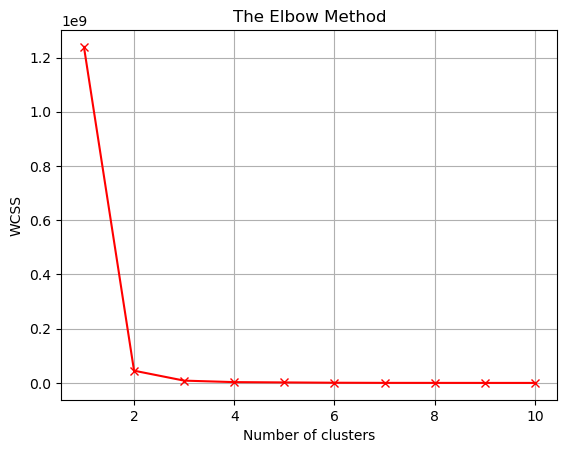

10.038962602615356


In [39]:
start = time.time()
X_final = cluster_org_2.drop(columns=['country'])
wcss2 = []
for i in range(1, 11):
    kmean2 = KMeans(n_clusters = i, random_state = 42)
    kmean2.fit(X_final)
    wcss2.append(kmean2.inertia_)
plt.plot(range(1, 11), wcss2, 'rx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
print(time.time() - start)

In [40]:
kmean = KMeans(n_clusters=2)
labels_c1 = kmean.fit_predict(X_final)

In [41]:
cluster_org_2['labels_c1'] = labels_c1
cluster_org_2

,country,income,gdpp,inflation,labels_c1
3,Angola,5900,3530,22.400,0
17,Benin,1820,758,0.885,0
25,Burkina Faso,1430,575,6.810,0
28,Cameroon,2660,1310,1.910,0
31,Central African Republic,888,446,2.010,0
32,Chad,1930,897,6.390,0
37,"Congo, Dem. Rep.",609,334,20.800,0
40,Cote d'Ivoire,2690,1220,5.390,0
49,Equatorial Guinea,33700,17100,24.900,1
63,Guinea,1190,648,16.100,0


In [42]:
cluster0 = cluster_org_2[cluster_org_2['labels_c1'] == 0]
cluster1 = cluster_org_2[cluster_org_2['labels_c1'] == 1]

In [43]:
cluster_0_df = cluster0[['gdpp', 'inflation', 'income']]
cluster_1_df = cluster1[['gdpp', 'inflation', 'income']]
fig = px.scatter_3d(cluster_0_df, x='gdpp', y='inflation', z='income', color_discrete_sequence=['yellow'])
fig.add_trace(px.scatter_3d(cluster_1_df, x='gdpp', y='inflation', z='income', color_discrete_sequence=['blue']).data[0])
fig.update_layout(scene=dict(xaxis_title='gdpp', yaxis_title='inflation', zaxis_title='income'))
fig.show()

In [44]:
cluster0.sort_values(['income','gdpp','inflation'],ascending=True)

,country,income,gdpp,inflation,labels_c1
37,"Congo, Dem. Rep.",609,334,20.800,0
112,Niger,814,348,2.550,0
31,Central African Republic,888,446,2.010,0
106,Mozambique,918,419,7.640,0
63,Guinea,1190,648,16.100,0
132,Sierra Leone,1220,399,17.200,0
64,Guinea-Bissau,1390,547,2.970,0
25,Burkina Faso,1430,575,6.810,0
66,Haiti,1500,662,5.450,0
17,Benin,1820,758,0.885,0


### According To the final list:
* **Congo, Dem. Rep**
* **Niger**
* **Central African Republic**
* **Mozambique**
* **Guinea**
* **Sierra Leone**

`Needs the most AID`

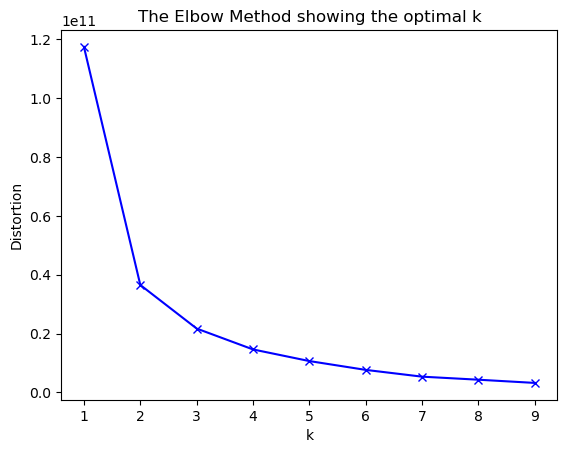

In [45]:
df_Kmeans = data.copy()
from sklearn import metrics
from scipy.spatial.distance import cdist
data_x = df_Kmeans.drop(columns=['country'])
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_x)
    distortions.append(kmeanModel.inertia_)    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Q4. Find optimal number of clusters using silhouette test ?

In [46]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6]
for K in n_clusters :
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(data_x)
    score = silhouette_score(data_x, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.7256314906273207)
For n_clusters = 3, silhouette score is 0.7003508054481694)
For n_clusters = 4, silhouette score is 0.6109297437247547)
For n_clusters = 5, silhouette score is 0.572715818235237)
For n_clusters = 6, silhouette score is 0.589653373502461)
